In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from lxml import html
import re
import os
from nltk.tokenize import word_tokenize
from nltk import download
from collections import Counter
import string
import nltk
import seaborn as sns
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [96]:
from fake_useragent import UserAgent
print(UserAgent().chrome)

Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36


In [97]:
url1 = 'https://octagon.media/?author=Евлалия%20Самедова'
response1 = rq.get(url1, headers={'User-Agent': UserAgent().chrome})
url2 = 'https://octagon.media/?author=Анна%20Таволга'
response2 = rq.get(url2, headers={'User-Agent': UserAgent().chrome})
url3 = 'https://octagon.media/?author=Алексей%20Бондарев'
response3 = rq.get(url3, headers={'User-Agent': UserAgent().chrome})
print(response1.status_code)
print(response2.status_code)
print(response3.status_code)

200
200
200


In [98]:
page = rq.get(url1)
soup1 = BeautifulSoup(page.text, features="html.parser")
print(soup1.prettify())

<!DOCTYPE html>
<html>
 <head>
  <!--Head-->
  <title>
   Евлалия Самедова: страница автора | Октагон.Медиа
  </title>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="Евлалия Самедова, статьи, тексты, материалы, октагон, новости, аналитика, публикации" name="keywords"/>
  <meta content="Евлалия Самедова - список публикаций на сайте Октагон.Медиа" name="description"/>
  <link href="https://octagon.media/favicon.png" rel="icon" type="image/png"/>
  <link href="https://octagon.media/?author=%D0%95%D0%B2%D0%BB%D0%B0%D0%BB%D0%B8%D1%8F%20%D0%A1%D0%B0%D0%BC%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0" rel="canonical"/>
  <link href="/_css/fonts.css" rel="stylesheet" type="text/css"/>
  <link href="https://octagon.media/_css/style.min.css" rel="stylesheet" type="text/css"/>
  <link href="https://octagon.media/_css/slick.css" rel="stylesheet" type="text/css"/>
  <link href="https://octagon.media/_css/lightslider.css" rel="stylesheet" type="

In [99]:
# проверим, можно ли получить ссылки на статьи с первой страницы списка с новостями по тегу 'a'
soup1.find_all('a')

[<a class="logo" href="/"></a>,
 <a class="menu_inv" href="/rassledovaniya/">Расследования</a>,
 <a href="https://octagon.media/novosti/">Новости</a>,
 <a href="/politika/">Политика</a>,
 <a href="/ekonomika/">Экономика</a>,
 <a href="/istorii/">Истории</a>,
 <a href="/vojna/">Война</a>,
 <a href="/mir/">Мир</a>,
 <a href="https://octagon.media/blogi/">Блоги</a>,
 <a href="https://sp.octagon.media/">Спецпроекты</a>,
 <a href="javascript:void(0)" onclick="showMenuBar()">
 <svg fill="none" height="8" viewbox="0 0 16 8" width="16" xmlns="http://www.w3.org/2000/svg">
 <path clip-rule="evenodd" d="M4 4C4 5.10457 3.10457 6 2 6C0.895431 6 0 5.10457 0 4C0 2.89543 0.895431 2 2 2C3.10457 2 4 2.89543 4 4ZM10 4C10 5.10457 9.10457 6 8 6C6.89543 6 6 5.10457 6 4C6 2.89543 6.89543 2 8 2C9.10457 2 10 2.89543 10 4ZM14 6C15.1046 6 16 5.10457 16 4C16 2.89543 15.1046 2 14 2C12.8954 2 12 2.89543 12 4C12 5.10457 12.8954 6 14 6Z" fill="white" fill-rule="evenodd"></path>
 </svg>
 </a>,
 <a class="search" href=

In [100]:
# Вытаскиваем ссылки с первой страницы со списком статей:
all_links1 = []
for i in soup1.find_all('a'):
    if i.get('class') == ['author-page__item-header']:
        all_links1.append(i.get('href'))
        
all_links1

['https://octagon.media/ekonomika/evgenij_kogan_silnyj_rubl_katastrofa_dlya_biznesa_.html',
 'https://octagon.media/ekonomika/_koronu_mozhno_snyat_no_vmyatiny_ot_nee_ostanutsya.html',
 'https://dv.octagon.media/ekonomika/dorogaya_i_kapriznaya_chto_nuzhno_znat_ob_energii_prilivov.html',
 'https://octagon.media/ekonomika/dmitrij_belousov_v_2021_godu_v_rossii_byl_zadushen_vosstanovitelnyj_rost_.html',
 'https://octagon.media/ekonomika/elena_korzun_chas_yukosa_stal_dlya_nas_privivkoj_.html',
 'https://octagon.media/ekonomika/komu_nuzhna_grechnevaya_panika.html',
 'https://octagon.media/istorii/tajna_baksanskogo_ushhelya.html',
 'https://octagon.media/istorii/kto_sazhaet_russkij_les_i_pochemu_on_gorit.html',
 'https://octagon.media/istorii/drugoj_vzglyad_na_starost.html',
 'https://octagon.media/ekonomika/evgenij_grunis_geologiya_dlya_gosudarstva_ne_prioritet_.html',
 'https://octagon.media/ekonomika/novaya_zhizn_suxogo_loga.html',
 'https://octagon.media/ekonomika/biznes_na_izyatii_v_gosso

In [101]:
# при помощи библиотеки Selenium заставляем парсер нажать на кнопочку "Еще" внизу страницы с первыми 50-ю статьями
#и вытащить ссылки на все статьи одного автора:

driver = webdriver.Chrome()
driver.get(url1)
page_num = 0

while True:
    try:
        driver.find_element(By.CSS_SELECTOR,'.load_more').click()
        time.sleep(3)
    except:
        break
html = driver.page_source.encode('utf-8')

all_links1 = [] # список ссылок на статьи, подписанные настоящим именем
soup1 = BeautifulSoup(html, 'lxml')
for i in soup1.find_all('a'):
    if i.get('class') == ['author-page__item-header']:
        all_links1.append(i.get('href'))
print(len(all_links1)) # - ответ соответствует числу статей на сайте
all_links1

37


['https://octagon.media/ekonomika/evgenij_kogan_silnyj_rubl_katastrofa_dlya_biznesa_.html',
 'https://octagon.media/ekonomika/_koronu_mozhno_snyat_no_vmyatiny_ot_nee_ostanutsya.html',
 'https://dv.octagon.media/ekonomika/dorogaya_i_kapriznaya_chto_nuzhno_znat_ob_energii_prilivov.html',
 'https://octagon.media/ekonomika/dmitrij_belousov_v_2021_godu_v_rossii_byl_zadushen_vosstanovitelnyj_rost_.html',
 'https://octagon.media/ekonomika/elena_korzun_chas_yukosa_stal_dlya_nas_privivkoj_.html',
 'https://octagon.media/ekonomika/komu_nuzhna_grechnevaya_panika.html',
 'https://octagon.media/istorii/tajna_baksanskogo_ushhelya.html',
 'https://octagon.media/istorii/kto_sazhaet_russkij_les_i_pochemu_on_gorit.html',
 'https://octagon.media/istorii/drugoj_vzglyad_na_starost.html',
 'https://octagon.media/ekonomika/evgenij_grunis_geologiya_dlya_gosudarstva_ne_prioritet_.html',
 'https://octagon.media/ekonomika/novaya_zhizn_suxogo_loga.html',
 'https://octagon.media/ekonomika/biznes_na_izyatii_v_gosso

In [13]:
driver = webdriver.Chrome()
driver.get(url2)
page_num = 0

while True:
    try:
        driver.find_element(By.CSS_SELECTOR,'.load_more').click()
        time.sleep(3)
    except:
        break
html = driver.page_source.encode('utf-8')

all_links2 = [] # список ссылок на статьи, подписанные псевдонимом
soup2 = BeautifulSoup(html, 'lxml')
for i in soup2.find_all('a'):
    if i.get('class') == ['author-page__item-header']: 
        all_links2.append(i.get('href'))
print(len(all_links2))# - ответ соответствует числу статей на сайте
all_links2

149


['https://octagon.media/ekonomika/eksport_s_novogo_proekta_novateka_otkladyvaetsya.html',
 'https://octagon.media/ekonomika/dezinflyacionnye_16_procentov.html',
 'https://octagon.media/ekonomika/tegeran_i_karakas_intensificiruyut_sotrudnichestvo.html',
 'https://octagon.media/istorii/kak_menyayutsya_pozicii_rossii_na_globalnom_rynke_azotnyx_udobrenij.html',
 'https://octagon.media/ekonomika/pochemu_deprivatizaciya_kvartir_ne_reshit_problemu_kommunalnyx_neplatezhej.html',
 'https://octagon.media/ekonomika/_yandeks_soxranil_nezavisimoe_lico.html',
 'https://octagon.media/ekonomika/npz_v_zone_riska_pochemu_avariya_na_zavode_lukojla_kasaetsya_vsex_neftyanikov.html',
 'https://octagon.media/ekonomika/grozit_li_rossii_poterya_liderstva_na_neftyanom_rynke_indii_.html',
 'https://octagon.media/ekonomika/nad_rynkom_nefti_vzmyvaet_veselyj_rodzher_.html',
 'https://octagon.media/ekonomika/chem_grozit_uzhestochenie_pravil_denezhnyx_perevodov_v_rossii.html',
 'https://octagon.media/ekonomika/butylk

In [14]:
driver = webdriver.Chrome()
driver.get(url3)
page_num = 0

while True:
    try:
        driver.find_element(By.CSS_SELECTOR,'.load_more').click()
        time.sleep(3)
    except:
        break
html = driver.page_source.encode('utf-8')

all_links3 = [] # список ссылок на статьи третьего автора
soup3 = BeautifulSoup(html, 'lxml')
for i in soup3.find_all('a'):
    if i.get('class') == ['author-page__item-header']: 
        all_links3.append(i.get('href'))
print(len(all_links3))# - ответ соответствует числу статей на сайте
all_links3

101


['https://octagon.media/ekonomika/uvidet_dudinku_i_razoritsya.html',
 'https://octagon.media/ekonomika/sibir_podsela_na_parallelnyj_import.html',
 'https://octagon.media/ekonomika/syrevoj_eksport_popolnil_krasnoyarskij_byudzhet.html',
 'https://octagon.media/ekonomika/pochtalony_prosyat_ognya.html',
 'https://octagon.media/politika/vladimir_putin_otpravlyaet_fpg_v_sibir.html',
 'https://octagon.media/ekonomika/rzhd_podelili_ugolnyj_pirog.html',
 'https://octagon.media/ekonomika/majning_stavyat_na_schetchik.html',
 'https://octagon.media/istorii/molodezhnye_bandy_80_x_ot_podmoskovya_do_dalnego_vostoka.html',
 'https://octagon.media/ekonomika/_rusal_vytesnyayut_na_vnutrennij_rynok.html',
 'https://octagon.media/ekonomika/maloetazhnaya_zastrojka_popala_pod_katok_renovacii.html',
 'https://octagon.media/ekonomika/rossiyan_zamanivayut_v_arktiku_deshevoj_ipotekoj.html',
 'https://octagon.media/politika/anatolij_bykov_priznan_vinovnym_po_vsem_statyam.html',
 'https://sibir.octagon.media/ekono

In [37]:
#скачаем текст по первой ссылке первого корпуса и почистим регуляркой от подписей под фотографиями, значков копирайтов и т.п. 
link0 = all_links1[0]
page0 = rq.get(link0)
soup0 = BeautifulSoup(page0.text)
text_list0 = soup0.find_all('p')[:-1]

for i in text_list0: #soup0.find_all('p'):
    if i.get('class') == ['image'] or i.get('class') == ['person']:
        while(i in text_list0):
            text_list0.remove(i)

text0 = ' '.join([i.text.strip() for i in text_list0]).replace('\xa0',' ')
final_text0 = re.sub(r'©octagon\.media[,.]\s\w{4}', ' ', text0)
final_text0

'В этом году Петербургский международный экономический форум (ПМЭФ) отмечает юбилей – мероприятие проводится в 25-й раз. В преддверии форума «Октагон» задал вопросы по ключевым финансовым темам последних недель активному постоянному участнику ПМЭФ, инвестиционному банкиру, основателю компании «Московские партнёры», профессору НИУ ВШЭ Евгению Когану. – Крупные российские банки объявили в этом месяце о введении комиссий за обслуживание текущих валютных счетов, что вызвало серьёзное беспокойство их владельцев. Что бы вы им посоветовали? – Есть несколько вариантов. Первый – перевести деньги в иностранные банки. Это возможно, хотя и не для всех. Второй – оставить в имеющейся валюте по принципу «либо ишак сдохнет, либо падишах помрёт». Месяца через два-три, возможно, что-то изменится. Третий вариант – конвертировать средства в другую валюту, за которую не будут взимать комиссию, например в индийские рупии, китайские юани или арабские дирхамы. – После 24 февраля многие россияне сняли валюту с

In [38]:
# прописываем функцию для скачивания и очистки корпуса статей одного автора и выгружаем все статьи каждого автора в отдельный файл
def GetArticles(link0):
    page0 = rq.get(link0)
    soup0 = BeautifulSoup(page0.text, features="html.parser")
    text_list = soup0.find_all('p')[:-1]

    for i in text_list:
        if i.get('class') == ['image'] or i.get('class') == ['person']:
            while(i in text_list):
                text_list.remove(i) 
    text = ' '.join([i.text.strip() for i in text_list]).replace('\xa0',' ').replace('  ',' ')
    text_clean = re.sub(r'©octagon\.media[,.]\s\w{4}', '', text)
    
    return text_clean


In [17]:
articles1 = [] 
for link in all_links1:

    try:
        article = GetArticles(link)
        articles1.append(article)
    except:
        print(link)
articles1 = ' '.join(articles1)

articles2 = [] 
for link in all_links2:

    try:
        article = GetArticles(link)
        articles2.append(article)
    except:
        print(link)
articles2 = ' '.join(articles2)

articles3 = [] 
for link in all_links3:

    try:
        article = GetArticles(link)
        articles3.append(article)
    except:
        print(link)
articles3 = ' '.join(articles3)

with open('articles_1.txt', 'w', encoding='utf-8') as file:
    file.write(articles1)
    
with open('articles_2.txt', 'w', encoding='utf-8') as file:
    file.write(articles2)

with open('articles_3.txt', 'w', encoding='utf-8') as file:
    file.write(articles3)

In [169]:
#Условные обозначения корпусов:
# Автор - корпус статей, подписанных настоящим именем автора
# Псевдоним - корпус статей, подписанных псевдонимом
# Коллега - корпус статей еще одного журналиста, пишущего на схожую тематику и взятый для сравнения

with open('articles_1.txt', 'r', encoding='utf-8') as f:
    text1 = f.read()
print('Общая длина корпуса автора:',len(text1),'знаков')    
text1 = text1.lower()
text1_list_nltk = word_tokenize(text1)
text1_list_without_punkt = [word for word in text1_list_nltk if word[0].isalpha()]
freqs_list1 = Counter(text1_list_without_punkt).most_common(10)
print('Самые частотные токены в предобработанном корпусе автора:', freqs_list1)
print('Количество токенов в предобработанном корпусе автора:', len(text1_list_without_punkt))
print('Количество уникальных токенов в предобработанном корпусе автора:', len(set(text1_list_without_punkt)))
articles1_nltk = ' '.join(text1_list_without_punkt)
with open('articles1_nltk.txt', 'w', encoding='utf-8') as file:
    file.write(articles1_nltk)

Общая длина корпуса автора: 300469 знаков
Самые частотные токены в предобработанном корпусе автора: [('в', 1704), ('и', 1034), ('на', 870), ('не', 589), ('что', 562), ('с', 444), ('по', 421), ('это', 274), ('для', 212), ('как', 210)]
Количество токенов в предобработанном корпусе автора: 40533
Количество уникальных токенов в предобработанном корпусе автора: 12008


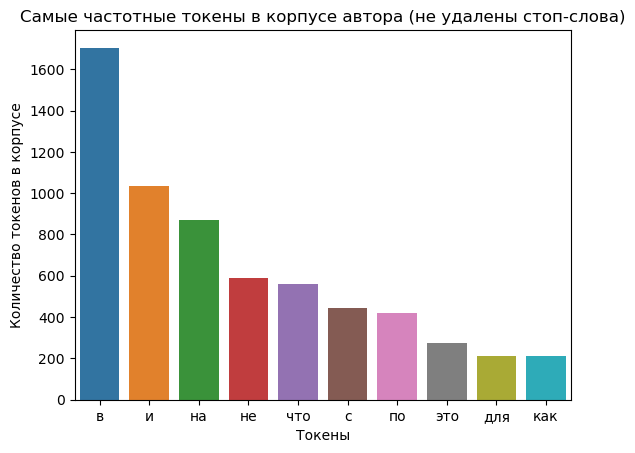

In [128]:
values = [pair[1] for pair in freqs_list1] # создаем список с частотами
labels = [pair[0] for pair in freqs_list1] # создаем список слов в том же порядке
plt.title("Самые частотные токены в корпусе автора (не удалены стоп-слова)")
plt.ylabel("Количество токенов в корпусе")
plt.xlabel("Токены")
plot = sns.barplot(x=labels, y=values)
plt.show()

In [4]:
# лемматизируем все корпуса, уберем стоп-слова и посмотрим на сходства/различия самых частотных слов в корпусах 
from pymystem3 import Mystem
mystem = Mystem()

In [5]:
# лемматизируем корпус автора и записываем его в файл для дальнейших исследований
with open('articles_1.txt', 'r', encoding='utf-8') as f:
    text1 = f.read()
text1_lemmatized = mystem.lemmatize(text1)
text1_without_punkt_lem = [word for word in text1_lemmatized if word[0].isalpha()]
text1_list_without_punkt_lem = ' '.join([word for word in text1_lemmatized if word[0].isalpha()])
with open('articles1_lem.txt', 'w', encoding='utf-8') as file:
    file.write(text1_list_without_punkt_lem)

[('год', 460), ('это', 316), ('компания', 234), ('который', 194), ('мочь', 156), ('россия', 141), ('свой', 128), ('октагон', 122), ('рубль', 115), ('становиться', 114)]


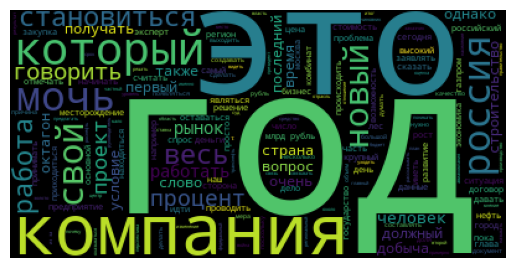

In [7]:
# убираем стоп-слова из лемматизированного корпуса автора и получаем самые частотные токены, строим облако слов
text1_without_stop_lem = [word for word in text1_without_punkt_lem if word not in stopwords.words("russian")]
freqs_list1sl = Counter(text1_without_stop_lem).most_common(10)
print(freqs_list1sl)

wordcloud1 = WordCloud().generate(', '.join(text1_without_stop_lem))
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.show()

In [138]:
# статей, написанных в корпусе под псевдонимом оказалось в 4 раза больше, чем статей автора
# для эксперимента приведем корпус под псевдонимом к длине корпуса автора, посчитаем количество частотных слов и сохраним в файл

with open('articles_2.txt', 'r', encoding='utf-8') as f:
    text2_short = f.read()[:300469] # приводим длину корпуса 2 к длине корпуса 1 
text2_short = text2_short.lower()
text2_short_list_nltk = word_tokenize(text2_short)
text2_short_list_without_punkt = [word for word in text2_short_list_nltk if word[0].isalpha()]
print('Самые частотные токены в укороченном предобработанном корпусе под псевдонимом:', Counter(text2_short_list_without_punkt).most_common(10))
print('Количество токенов в укороченном предобаботанном корпусе под псевдонимом:', len(text2_short_list_without_punkt)) # кол-во токенов в предобработанном тексте
print('Количество уникальных токенов в укороченном предобаботанном корпусе под псевдонимом:', len(set(text2_short_list_without_punkt))) # кол-во уникальных токенов в предобработанном тексте
articles2_short_nltk = ' '.join(text2_short_list_without_punkt)
with open('articles2_short_nltk.txt', 'w', encoding='utf-8') as file:
    file.write(articles2_short_nltk)

Самые частотные токены в укороченном предобработанном корпусе под псевдонимом: [('в', 1713), ('и', 981), ('на', 897), ('не', 542), ('что', 504), ('по', 491), ('с', 461), ('для', 248), ('за', 241), ('года', 203)]
Количество токенов в укороченном предобаботанном корпусе под псевдонимом: 39468
Количество уникальных токенов в укороченном предобаботанном корпусе под псевдонимом: 10487


In [158]:
# теперь проделаем те же действия для корпуса под псевдонимом в его полном объеме и также запишем токены в файл для дальнейших исследований
# по результатам видно, что самые частотные токены в укороченном корпусе под псевдонимом немного не совпадают с частотными 
# токенами из полного корпуса под псевдонимом
with open('articles_2.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()
print('Общая длина корпуса под псевдонимом:',len(text2),'знаков')
text2 = text2.lower()
text2_list_nltk = word_tokenize(text2)
text2_list_without_punkt = [word for word in text2_list_nltk if word[0].isalpha()]
freqs_list2 = Counter(text2_list_without_punkt).most_common(10)
print('Самые частотные токены в предобработанном корпусе под псевдонимом:', freqs_list2)
print('Количество токенов в предобработанном корпусе под псевдонимом:', len(text2_list_without_punkt))
print('Количество уникальных токенов в предобработанном корпусе под псевдонимом:', len(set(text2_list_without_punkt)))
articles2_nltk = ' '.join(text2_list_without_punkt)
with open('articles2_nltk.txt', 'w', encoding='utf-8') as file:
    file.write(articles2_nltk)

Общая длина корпуса под псевдонимом: 1207630 знаков
Самые частотные токены в предобработанном корпусе под псевдонимом: [('в', 7116), ('и', 4128), ('на', 3580), ('не', 2226), ('что', 2145), ('по', 1907), ('с', 1852), ('для', 953), ('это', 833), ('как', 811)]
Количество токенов в предобработанном корпусе под псевдонимом: 160091
Количество уникальных токенов в предобработанном корпусе под псевдонимом: 26626


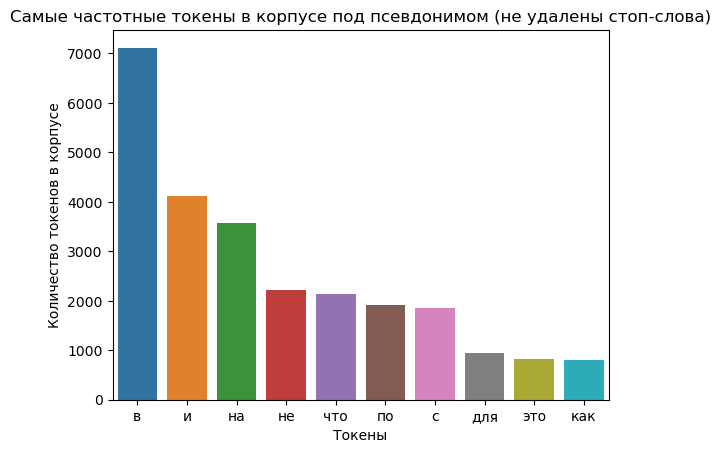

In [130]:
# строим график самых частотных токенов в корпусе под псевдонимом
values = [pair[1] for pair in freqs_list2] 
labels = [pair[0] for pair in freqs_list2] 
plt.title("Самые частотные токены в корпусе под псевдонимом (не удалены стоп-слова)")
plt.ylabel("Количество токенов в корпусе")
plt.xlabel("Токены")
plot = sns.barplot(x=labels, y=values)
plt.show()

In [9]:
# лемматизируем корпус под псевдонимом и записыываем его в файл для дальнейших исследований
with open('articles_2.txt', 'r', encoding='utf-8') as f:
    text2 = f.read()
text2_lemmatized = mystem.lemmatize(text2)
text2_without_punkt_lem = [word for word in text2_lemmatized if word[0].isalpha()]
text2_list_without_punkt_lem = ' '.join([word for word in text2_lemmatized if word[0].isalpha()])
with open('articles2_lem.txt', 'w', encoding='utf-8') as file:
    file.write(text2_list_without_punkt_lem)

[('год', 1700), ('это', 1152), ('процент', 914), ('россия', 801), ('компания', 783), ('который', 776), ('российский', 701), ('цена', 678), ('мочь', 664), ('рынок', 607)]


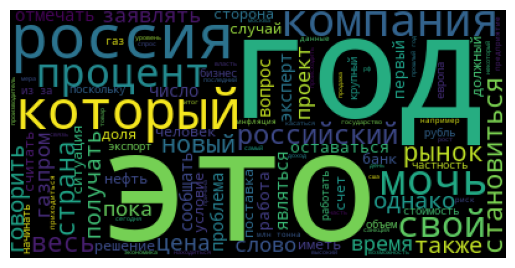

In [11]:
# удаляем из лемматизированного корпуса под псевдонимом стоп-слова и получаем самые частотные токены, строим облако слов
text2_without_stop_lem = [word for word in text2_without_punkt_lem if word not in stopwords.words("russian")]
freqs_list2sl = Counter(text2_without_stop_lem).most_common(10)
print(freqs_list2sl)

wordcloud2 = WordCloud().generate(', '.join(text2_without_stop_lem))
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.show()

In [140]:
# статей в корпусе коллеги оказалось в 2,5 раза больше, чем статей автора
# для эксперимента приведем корпус коллеги к длине корпуса автора, посчитаем количество частотных слов и сохраним в файл

with open('articles_3.txt', 'r', encoding='utf-8') as f:
    text3_short = f.read()[:300469]
text3_short = text3_short.lower()
text3_short_list_nltk = word_tokenize(text3_short)
text3_short_list_without_punkt = [word for word in text3_short_list_nltk if word[0].isalpha()]
print('Самые частотные токены в укороченном предобработанном корпусе коллеги:', Counter(text3_short_list_without_punkt).most_common(10))
print('Количество токенов в укороченном предобработанном корпусе коллеги:', len(text3_short_list_without_punkt))
print('Количество уникальных токенов в укороченном предобработанном корпусе коллеги:', len(set(text3_short_list_without_punkt)))
articles3_short_nltk = ' '.join(text3_short_list_without_punkt)
with open('articles3_short_nltk.txt', 'w', encoding='utf-8') as file:
    file.write(articles3_short_nltk)

Самые частотные токены в укороченном предобработанном корпусе коллеги: [('в', 1742), ('и', 990), ('на', 691), ('с', 441), ('не', 423), ('по', 388), ('что', 386), ('это', 234), ('для', 203), ('из', 198)]
Количество токенов в укороченном предобработанном корпусе коллеги: 39226
Количество уникальных токенов в укороченном предобработанном корпусе коллеги: 12135


In [163]:
# теперь проделаем те же действия для корпуса коллеги в его полном объеме и также запишем токены в файл для дальнейших исследований
# по результатам видно, что самые частотные токены в укороченном корпусе коллеги немного не совпадают с частотными токенами из 
# полного корпуса коллеги

with open('articles_3.txt', 'r', encoding='utf-8') as f:
    text3 = f.read()
print('Общая длина корпуса коллеги:',len(text3),'знаков')
text3 = text3.lower()
text3_list_nltk = word_tokenize(text3)
text3_list_without_punkt = [word for word in text3_list_nltk if word[0].isalpha()]
freqs_list3 = Counter(text3_list_without_punkt).most_common(10)

print('Самые частотные токены в предобработанном корпусе коллеги:', freqs_list3)
print('Количество токенов в предобработанном корпусе коллеги:', len(text3_list_without_punkt))
print('Количество уникальных токенов в укороченном предобработанном корпусе коллеги:', len(set(text3_list_without_punkt)))
articles3_nltk = ' '.join(text3_list_without_punkt)
with open('articles3_nltk.txt', 'w', encoding='utf-8') as file:
    file.write(articles3_nltk)

Общая длина корпуса коллеги: 706583 знаков
Самые частотные токены в предобработанном корпусе коллеги: [('в', 3972), ('и', 2299), ('на', 1793), ('не', 1013), ('с', 998), ('по', 909), ('что', 901), ('это', 565), ('для', 479), ('но', 436)]
Количество токенов в предобработанном корпусе коллеги: 91829
Количество уникальных токенов в укороченном предобработанном корпусе коллеги: 20755


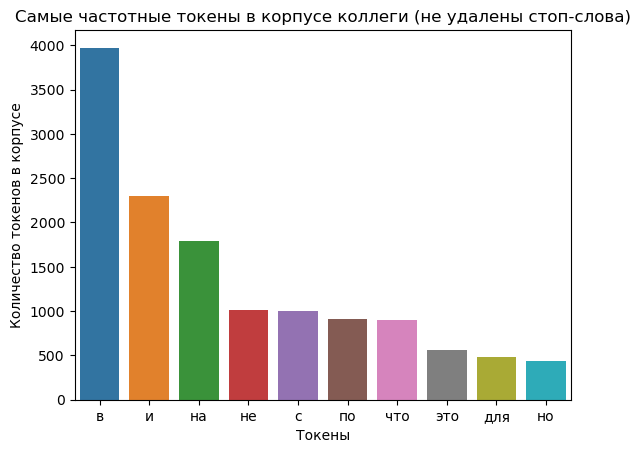

In [144]:
# строим график самых частотных токенов в корпусе коллеги 
values = [pair[1] for pair in freqs_list3] # создаем список с частотами
labels = [pair[0] for pair in freqs_list3] # создаем список слов в том же порядке
plt.title("Самые частотные токены в корпусе коллеги (не удалены стоп-слова)")
plt.ylabel("Количество токенов в корпусе")
plt.xlabel("Токены")
plot = sns.barplot(x=labels, y=values)
plt.show()  
   

In [146]:
# лемматизируем корпус коллеги и записыываем его в файл для дальнейших исследований
with open('articles_3.txt', 'r', encoding='utf-8') as f:
    text3 = f.read()
text3_lemmatized = mystem.lemmatize(text3)
text3_without_punkt_lem = [word for word in text3_lemmatized if word[0].isalpha()]
text3_list_without_punkt_lem = ' '.join([word for word in text3_lemmatized if word[0].isalpha()])
with open('articles3_lem.txt', 'w', encoding='utf-8') as file:
    file.write(text3_list_without_punkt_lem)

[('год', 1012), ('это', 717), ('красноярский', 531), ('который', 512), ('край', 424), ('компания', 347), ('красноярск', 307), ('регион', 296), ('весь', 293), ('россия', 275)]


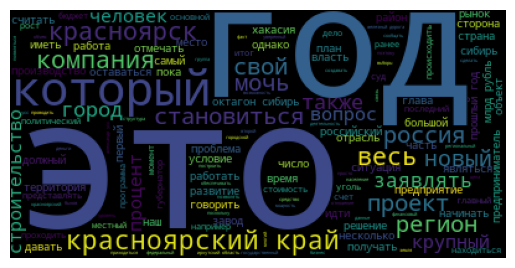

In [151]:
# удаляем из лемматизированного корпуса коллеги стоп-слова и получаем самые частотные токены, строим облако слов
text3_without_stop_lem = [word for word in text3_without_punkt_lem if word not in stopwords.words("russian")]
freqs_list3sl = Counter(text3_without_stop_lem).most_common(10)
print(freqs_list3sl)

wordcloud3 = WordCloud().generate(', '.join(text3_without_stop_lem))
plt.imshow(wordcloud3) 
plt.axis("off") 
plt.show()

In [19]:
# на основании утверждения Джона Берроуза о том, что служебные слова играют важную роль в атрибуции авторства, 
#продолжаем дальнейшую работу с корпусами, которые не лемматизировались и в которых не удалялись стоп-слова
# найдем самые частотные биграмы в корпусе автора
freq_bigramms1 = Counter(nltk.bigrams(text1_list_without_punkt))
freq_bigramms1.most_common(10)

[(('в', 'году'), 79),
 (('том', 'что'), 68),
 (('о', 'том'), 57),
 (('в', 'россии'), 52),
 (('млрд', 'рублей'), 50),
 (('в', 'том'), 48),
 (('у', 'нас'), 45),
 (('в', 'этом'), 35),
 (('что', 'в'), 35),
 (('то', 'есть'), 33)]

In [20]:
# найдем самые частотные биграмы в корпусе под псевдонимом
freq_bigramms2 = Counter(nltk.bigrams(text2_list_without_punkt))
freq_bigramms2.most_common(10)

[(('в', 'году'), 285),
 (('том', 'что'), 258),
 (('в', 'россии'), 199),
 (('о', 'том'), 192),
 (('в', 'том'), 192),
 (('по', 'его'), 159),
 (('на', 'процентов'), 154),
 (('что', 'в'), 148),
 (('в', 'этом'), 143),
 (('цены', 'на'), 137)]

In [21]:
# найдем самые частотные биграмы в корпусе коллеги
freq_bigramms3 = Counter(nltk.bigrams(text3_list_without_punkt))
freq_bigramms3.most_common(10)

[(('красноярского', 'края'), 195),
 (('в', 'году'), 194),
 (('в', 'красноярске'), 102),
 (('в', 'том'), 95),
 (('при', 'этом'), 94),
 (('млрд', 'рублей'), 93),
 (('в', 'этом'), 72),
 (('в', 'россии'), 66),
 (('а', 'также'), 61),
 (('то', 'что'), 59)]

In [4]:
# Опираясь на утверждение Дж. Берроуза о том, что предлоги, союзы и относительные местоимения играют основную роль в определении
# авторства, попробуем органзовать морф-ю разметку трех скачанных корпусов, посчитаем количество указанных выше служебных частей
# речи  и сравним пропорции этих частей речи по отношению к длине корпусов
import spacy

In [5]:
nlp_rus = spacy.load('ru_core_news_sm')
nlp_rus.max_length = 1207700

In [27]:
with open('articles_1.txt', 'r', encoding='utf-8') as text:
    corpus1 = text.read()
    doc = nlp_rus(corpus1.lower()) 
    new_corpus1 = ' '.join([' '.join([str(token.text) + '_' + str(token.pos_) + '_' + str(token.morph)]) for token in doc])
    new_corpus1 = re.sub('\|', '_', new_corpus1)
    print(new_corpus1) # - это текст корпуса автора с морфологической разметкой

в_ADP_ этом_DET_Case=Loc_Gender=Masc_Number=Sing году_NOUN_Animacy=Inan_Case=Loc_Gender=Masc_Number=Sing петербургский_ADJ_Case=Nom_Degree=Pos_Gender=Masc_Number=Sing международный_ADJ_Case=Nom_Degree=Pos_Gender=Masc_Number=Sing экономический_ADJ_Case=Nom_Degree=Pos_Gender=Masc_Number=Sing форум_NOUN_Animacy=Inan_Case=Nom_Gender=Masc_Number=Sing (_PUNCT_ пмэф_PROPN_Animacy=Inan_Case=Nom_Gender=Masc_Number=Sing )_PUNCT_ отмечает_VERB_Aspect=Imp_Mood=Ind_Number=Sing_Person=Third_Tense=Pres_VerbForm=Fin_Voice=Act юбилей_NOUN_Animacy=Inan_Case=Acc_Gender=Masc_Number=Sing –_PUNCT_ мероприятие_NOUN_Animacy=Inan_Case=Nom_Gender=Neut_Number=Sing проводится_VERB_Aspect=Imp_Mood=Ind_Number=Sing_Person=Third_Tense=Pres_VerbForm=Fin_Voice=Pass в_ADP_ 25-й_ADJ_Animacy=Inan_Case=Acc_Degree=Pos_Gender=Masc_Number=Sing раз_NOUN_Animacy=Inan_Case=Acc_Gender=Masc_Number=Sing ._PUNCT_ в_ADP_ преддверии_NOUN_Animacy=Inan_Case=Loc_Gender=Neut_Number=Sing форума_NOUN_Animacy=Inan_Case=Gen_Gender=Masc_Number

In [63]:
number_of_CONJ1 = len(re.findall('_[\w]CONJ_ ', new_corpus1))
print(f'В корпусе автора {number_of_CONJ1} союзов.')

В корпусе автора 2391 союзов.


In [65]:
number_of_ADP1 = len(re.findall('_ADP_ ', new_corpus1))
print(f'В корпусе автора {number_of_ADP1} предлогов.')

В корпусе автора 5351 предлогов.


In [88]:
number_all_PRON1 = len(re.findall(r'\w+_PRON_', new_corpus1))
#print(number_all_PRON1)
print(f'В корпусе автора {number_all_PRON1} местоимений.')

В корпусе автора 2063 местоимений.


In [33]:
# создадим список относительных местоимений; данный список несовершенен, в него могут попасть и другие (например, вопросительные) 
# местоимения, но по Берроузу служебные части речи в любом случае важны для аттрибуции текстов
R_PRON = ['кто_PRON_', 'что_PRON_', 'чей_PRON_', 'какой_PRON_', 'который_PRON_', 'каков_PRON_', 'чье_PRON_', 'какое_PRON_', 'которое_PRON_', 'каково_PRON_', 'чья_PRON_', 'какая_PRON_', 'которая_PRON_', 'какова_PRON_', 'чьи_PRON_', 'какие_PRON_', 'которые_PRON_', 'каковы_PRON_', 'сколько_PRON_', 'кого_PRON_', 'чего_PRON_', 'чьего_PRON_', 'какого_PRON_', 'которого_PRON_', 'чьей_PRON_', 'которой_PRON_', 'чьих_PRON_', 'каких_PRON_', 'которых_PRON_', 'скольких_PRON_', 'кому_PRON_', 'чему_PRON_', 'чьему_PRON_', 'какому_PRON_', 'которому_PRON_', 'чьим_PRON_', 'каким_PRON_', 'которым_PRON_', 'скольким_PRON_', 'чьё_PRON_', 'чью_PRON_', 'какую_PRON_', 'которою_PRON_', 'кем_PRON_', 'чем_PRON_', 'чьими_PRON_', 'какими_PRON_', 'которыми_PRON_', 'сколькими_PRON_', 'ком_PRON_', 'чём_PRON_', 'чьём_PRON_', 'чьем_PRON_', 'каком_PRON_', 'котором_PRON_', 'сколь_PRON_']

In [97]:
R_PRON1 = []# посчитаем количество относительных местоимений в корпусе
all_PRON1 = re.findall(r'\w+_PRON_', new_corpus1)
for pron in all_PRON1:
    if pron in R_PRON:
        R_PRON1.append(pron)
        num_R_PRON1 = len(R_PRON1)
print(f'В корпусе автора {num_R_PRON1} относительных местоимений.')

В корпусе автора 334 относительных местоимений.


In [21]:
with open('articles_2.txt', 'r', encoding='utf-8') as text:
    corpus2 = text.read()
    doc2 = nlp_rus(corpus2.lower()) 
    new_corpus2 = ' '.join([' '.join([str(token.text) + '_' + str(token.pos_) + '_' + str(token.morph)]) for token in doc2])
    new_corpus2 = re.sub('\|', '_', new_corpus2)
    print(new_corpus2[:1000]) # - т. к. объем корпуса под псевдонимом превышает 1 200 000 слов и знаков, то не выводим его на 
    #печать целиком, проверяем успешность морфологической разметки на небольшом отрезке

японская_ADJ_Case=Nom_Degree=Pos_Gender=Fem_Number=Sing транспортная_ADJ_Case=Nom_Degree=Pos_Gender=Fem_Number=Sing компания_NOUN_Animacy=Inan_Case=Nom_Gender=Fem_Number=Sing mitsui_X_Foreign=Yes o.s.k_X_Foreign=Yes ._PUNCT_ lines_PROPN_Foreign=Yes сообщила_VERB_Aspect=Perf_Gender=Fem_Mood=Ind_Number=Sing_Tense=Past_VerbForm=Fin_Voice=Act о_ADP_ том_PRON_Animacy=Inan_Case=Loc_Gender=Neut_Number=Sing ,_PUNCT_ что_SCONJ_ из_ADP_ -_ADP_ за_ADP_ санкций_NOUN_Animacy=Inan_Case=Gen_Gender=Fem_Number=Plur не_PART_Polarity=Neg может_VERB_Aspect=Imp_Mood=Ind_Number=Sing_Person=Third_Tense=Pres_VerbForm=Fin_Voice=Act передать_VERB_Aspect=Perf_VerbForm=Inf_Voice=Act проекту_NOUN_Animacy=Inan_Case=Dat_Gender=Masc_Number=Sing «_PUNCT_ арктик_NOUN_Animacy=Inan_Case=Nom_Gender=Masc_Number=Sing спг_PROPN_Animacy=Inan_Case=Nom_Gender=Masc_Number=Sing 2_NUM_ »_PUNCT_ ,_PUNCT_ в_ADP_ котором_PRON_Case=Loc_Gender=Masc_Number=Sing ей_PRON_Case=Dat_Gender=Fem_Number=Sing_Person=Third принадлежат_VERB_Aspect

In [69]:
number_of_CONJ2 = len(re.findall('_[\w]CONJ_ ', new_corpus2))
print(f'В корпусе под псевдонимом {number_of_CONJ2} союзов.')

В корпусе под псевдонимом 9024 союзов.


In [70]:
number_of_ADP2 = len(re.findall('_ADP_ ', new_corpus2))
print(f'В корпусе под псевдонимом {number_of_ADP2} предлогов.')

В корпусе под псевдонимом 22613 предлогов.


In [90]:
number_all_PRON2 = len(re.findall(r'\w+_PRON_', new_corpus2))
print(f'В корпусе под псевдонимом {number_all_PRON2} местоимений.')

В корпусе под псевдонимом 6287 местоимений.


In [ ]:
print()

In [98]:
R_PRON2 = []# посчитаем количество относительных местоимений в корпусе под псевдонимом
all_PRON2 = re.findall(r'\w+_PRON_', new_corpus2)
for pron in all_PRON2:
    if pron in R_PRON:
        R_PRON2.append(pron)
        num_R_PRON2 = len(R_PRON2)
print(f'В корпусе под псевдонимом {num_R_PRON2} относительных местоимений.')

В корпусе под псевдонимом 1186 относительных местоимений.


In [8]:
with open('articles_3.txt', 'r', encoding='utf-8') as text:
    corpus3 = text.read()
    doc3 = nlp_rus(corpus3.lower()) 
    new_corpus3 = ' '.join([' '.join([str(token.text) + '_' + str(token.pos_) + '_' + str(token.morph)]) for token in doc3])
    new_corpus3 = re.sub('\|', '_', new_corpus3)
    print(new_corpus3 [:1000]) # - т. к. объем корпуса коллеги превышает 700 000 слов и знаков, то не выводим его на печать
    # целиком, проверяем успешность морфологической разметки на небольшом отрезке

в_ADP_ августе_NOUN_Animacy=Inan_Case=Loc_Gender=Masc_Number=Sing прошлого_ADJ_Case=Gen_Degree=Pos_Gender=Masc_Number=Sing года_NOUN_Animacy=Inan_Case=Gen_Gender=Masc_Number=Sing президент_NOUN_Animacy=Anim_Case=Nom_Gender=Masc_Number=Sing рф_PROPN_Animacy=Inan_Case=Gen_Gender=Fem_Number=Sing владимир_PROPN_Animacy=Anim_Case=Nom_Gender=Masc_Number=Sing путин_PROPN_Animacy=Anim_Case=Nom_Gender=Masc_Number=Sing дал_VERB_Aspect=Perf_Gender=Masc_Mood=Ind_Number=Sing_Tense=Past_VerbForm=Fin_Voice=Act поручение_NOUN_Animacy=Inan_Case=Acc_Gender=Neut_Number=Sing разработать_VERB_Aspect=Perf_VerbForm=Inf_Voice=Act программу_NOUN_Animacy=Inan_Case=Acc_Gender=Fem_Number=Sing развития_NOUN_Animacy=Inan_Case=Gen_Gender=Neut_Number=Sing туризма_NOUN_Animacy=Inan_Case=Gen_Gender=Masc_Number=Sing в_ADP_ красноярском_ADJ_Case=Loc_Degree=Pos_Gender=Masc_Number=Sing крае_NOUN_Animacy=Inan_Case=Loc_Gender=Masc_Number=Sing ._PUNCT_ региональные_ADJ_Case=Nom_Degree=Pos_Number=Plur власти_NOUN_Animacy=Inan_

In [23]:
all_CONJ3 = re.findall(r'\w+_[\w]CONJ_ ', new_corpus3)
number_of_CONJ3 = len(re.findall('_[\w]CONJ_ ', new_corpus3))
print(f'В корпусе коллеги {number_of_CONJ3} союзов.')

В корпусе коллеги 4660 союзов.


In [24]:
all_ADP3 = re.findall(r'\w+_ADP_ ', new_corpus3)
number_of_ADP3 = len(re.findall('_ADP_ ', new_corpus3))
print(f'В корпусе коллеги {number_of_ADP3} предлогов.')


В корпусе коллеги 11846 предлогов.


In [22]:
all_PRON3 = re.findall(r'\w+_PRON_', new_corpus3)
number_all_PRON3 = len(re.findall(r'\w+_PRON_', new_corpus3))
print(f'В корпусе коллеги {number_all_PRON3} местоимений.')

В корпусе коллеги 3578 местоимений.


In [99]:
R_PRON3 = []# посчитаем количество относительных местоимений в корпусе коллеги
all_PRON3 = re.findall(r'\w+_PRON_', new_corpus3)
for pron in all_PRON3:
    if pron in R_PRON:
        R_PRON3.append(pron)
        num_R_PRON3 = len(R_PRON3)
print(f'В корпусе коллеги {num_R_PRON3} относительных местоимений.')

В корпусе коллеги 732 относительных местоимений.


In [53]:
# для нахождения долей интересующих нас служебных частей речи создаем переменные с длинами корпусов, 
# в этом варианте берем полные длины, учитывающие все слова и символы до токенизации
text1_l = len(text1)
text2_l = len(text2)
text3_l = len(text3)

In [100]:
import pandas as pd
  
data = {
     'Союзы': [number_of_CONJ1, round(number_of_CONJ1 * 100 / text1_l, 1), number_of_CONJ2, round(number_of_CONJ2 * 100 / text2_l, 1), number_of_CONJ3, round(number_of_CONJ3 * 100 / text3_l,1)],
     'Предлоги': [number_of_ADP1, round(number_of_ADP1 * 100 / text1_l, 1), number_of_ADP2, round(number_of_ADP2 * 100 / text2_l, 1), number_of_ADP3, round(number_of_ADP3 * 100 / text3_l,1)],
     'Местоимения': [number_all_PRON1, round(number_all_PRON1 * 100 / text1_l, 1), number_all_PRON2, round(number_all_PRON2 * 100 / text2_l, 1), number_all_PRON3, round(number_all_PRON3 * 100 / text3_l,1)],
     'Относительные местоимения': [num_R_PRON1, round(num_R_PRON1 * 100 / text1_l, 1) ,num_R_PRON2, round(num_R_PRON2 * 100 / text2_l, 1), num_R_PRON3, round(num_R_PRON3* 100 / text3_l,1)]
     
}
                
POS_Count = pd.DataFrame.from_dict(data).T.rename(columns={0:"Автор", 1:"Доля(А)", 2:"Псевдоним", 3:"Доля(П)", 4:"Коллега", 5:"Доля(К)"})

POS_Count

,Автор,Доля(А),Псевдоним,Доля(П),Коллега,Доля(К)
Союзы,2391.0,0.8,9024.0,0.7,4660.0,0.7
Предлоги,5351.0,1.8,22613.0,1.9,11846.0,1.7
Местоимения,2063.0,0.7,6287.0,0.5,3578.0,0.5
Относительные местоимения,334.0,0.1,1186.0,0.1,732.0,0.1


In [105]:
# для нахождения долей интересующих нас служебных частей речи создаем переменные с длинами корпусов, 
# в этом варианте берем длины токенизированных корпусов

text1_lwp = len(text1_list_without_punkt)
text2_lwp = len(text2_list_without_punkt)
text3_lwp = len(text3_list_without_punkt)

In [106]:
# Посчитаем такой же датафрейм, но для длины токенизированных корпусов
import pandas as pd
  
data = {
     'Союзы': [number_of_CONJ1, round(number_of_CONJ1 * 100 / text1_lwp, 1), number_of_CONJ2, round(number_of_CONJ2 * 100 / text2_lwp, 1), number_of_CONJ3, round(number_of_CONJ3 * 100 / text3_lwp,1)],
     'Предлоги': [number_of_ADP1, round(number_of_ADP1 * 100 / text1_lwp, 1), number_of_ADP2, round(number_of_ADP2 * 100 / text2_lwp, 1), number_of_ADP3, round(number_of_ADP3 * 100 / text3_lwp,1)],
     'Местоимения': [number_all_PRON1, round(number_all_PRON1 * 100 / text1_lwp, 1), number_all_PRON2, round(number_all_PRON2 * 100 / text2_lwp, 1), number_all_PRON3, round(number_all_PRON3 * 100 / text3_lwp,1)],
     'Относительные местоимения': [num_R_PRON1, round(num_R_PRON1 * 100 / text1_lwp, 1) ,num_R_PRON2, round(num_R_PRON2 * 100 / text2_lwp, 1), num_R_PRON3, round(num_R_PRON3* 100 / text3_lwp,1)]
     
}
                
POS_Count = pd.DataFrame.from_dict(data).T.rename(columns={0:"Автор", 1:"Доля(А)", 2:"Псевдоним", 3:"Доля(П)", 4:"Коллега", 5:"Доля(К)"})

POS_Count

,Автор,Доля(А),Псевдоним,Доля(П),Коллега,Доля(К)
Союзы,2391.0,5.9,9024.0,5.6,4660.0,5.1
Предлоги,5351.0,13.2,22613.0,14.1,11846.0,12.9
Местоимения,2063.0,5.1,6287.0,3.9,3578.0,3.9
Относительные местоимения,334.0,0.8,1186.0,0.7,732.0,0.8


In [78]:
# Опираясь на утверждение Дж. Берроуза о том, что предлоги, союзы и относительные местоимения играют основную роль в определении
# авторства, попробуем для всех корпусов подсчитать самые частотные служебные слова, относящиеся к указанным выше частям речи, 
# список довольно сильно похож на список самых частотных токенов, но отличается отсутствием не вошедших в него частиц.
set1 = text1_list_without_punkt
tagged_set1 = nltk.pos_tag(set1, lang='rus')
selected_tags = ['CONJ', 'PR', 'S-PRO', 'A-PRO=f', 'A-PRO=n', 'A-PRO=m', 'A-PRO=pl', 'ADV-PRO', 'PRAEDIC-PRO']
selected_words1 = [word for word, tag in tagged_set1 if tag in selected_tags]
selected_tags_counts1 = Counter(selected_words1)
selected_tags_counts1.most_common(10) # список для корпуса автора

[('в', 1704),
 ('и', 1034),
 ('на', 870),
 ('что', 556),
 ('с', 444),
 ('по', 421),
 ('это', 258),
 ('для', 212),
 ('как', 210),
 ('а', 201)]

In [86]:
# Опираясь на утверждение Дж. Берроуза о том, что предлоги, союзы и относительные местоимения играют основную роль в определении
# авторства, попробуем для всех корпусов  подсчитать самые частотные служебные слова с соответствующими частеречнымии тегами.
set5 = text1_list_without_punkt
tagged_set5 = nltk.pos_tag(set5, lang='rus')
selected_tags = ['CONJ', 'PR', 'S-PRO', 'A-PRO=f', 'A-PRO=n', 'A-PRO=m', 'A-PRO=pl', 'ADV-PRO', 'PRAEDIC-PRO']
word_freq5 = Counter((word, tag) for word, tag in tagged_set5 if tag in selected_tags)
word_freq5.most_common(15) # список с pos-tags для корпуса автора



[(('в', 'PR'), 1704),
 (('и', 'CONJ'), 1034),
 (('на', 'PR'), 870),
 (('с', 'PR'), 444),
 (('что', 'CONJ'), 429),
 (('по', 'PR'), 421),
 (('это', 'S-PRO'), 236),
 (('для', 'PR'), 212),
 (('а', 'CONJ'), 201),
 (('к', 'PR'), 197),
 (('но', 'CONJ'), 179),
 (('о', 'PR'), 178),
 (('как', 'CONJ'), 174),
 (('он', 'S-PRO'), 172),
 (('у', 'PR'), 163)]

In [80]:
set2 = text2_list_without_punkt
tagged_set2 = nltk.pos_tag(set2, lang='rus')
selected_tags = ['CONJ', 'PR', 'S-PRO', 'A-PRO=f', 'A-PRO=n', 'A-PRO=m', 'A-PRO=pl', 'ADV-PRO', 'PRAEDIC-PRO']
selected_words2 = [word for word, tag in tagged_set2 if tag in selected_tags]
selected_tags_counts2 = Counter(selected_words2)
selected_tags_counts2.most_common(10)# список для корпуса  под псевдонимом

[('в', 7116),
 ('и', 4128),
 ('на', 3580),
 ('что', 2138),
 ('по', 1907),
 ('с', 1852),
 ('для', 953),
 ('как', 811),
 ('это', 795),
 ('за', 790)]

In [85]:
set6 = text2_list_without_punkt
tagged_set6 = nltk.pos_tag(set6, lang='rus')
selected_tags = ['CONJ', 'PR', 'S-PRO', 'A-PRO=f', 'A-PRO=n', 'A-PRO=m', 'A-PRO=pl', 'ADV-PRO', 'PRAEDIC-PRO']
word_freq6 = Counter((word, tag) for word, tag in tagged_set6 if tag in selected_tags)
word_freq6.most_common(15)# список с pos-tags для корпуса под псевдонимом

[(('в', 'PR'), 7116),
 (('и', 'CONJ'), 4128),
 (('на', 'PR'), 3580),
 (('по', 'PR'), 1907),
 (('с', 'PR'), 1852),
 (('что', 'CONJ'), 1726),
 (('для', 'PR'), 953),
 (('за', 'PR'), 790),
 (('к', 'PR'), 755),
 (('о', 'PR'), 717),
 (('это', 'S-PRO'), 717),
 (('как', 'CONJ'), 676),
 (('из', 'PR'), 656),
 (('от', 'PR'), 614),
 (('а', 'CONJ'), 561)]

In [48]:
set3 = text3_list_without_punkt
tagged_set3 = nltk.pos_tag(set3, lang='rus')
selected_pos = ['CONJ', 'PR', 'S-PRO', 'A-PRO=f', 'A-PRO=n', 'A-PRO=m', 'A-PRO=pl', 'ADV-PRO', 'PRAEDIC-PRO']
selected_words3 = [word for word, tag in tagged_set3 if tag in selected_pos]
selected_pos_counts3 = Counter(selected_words3)
selected_pos_counts3.most_common(10) # список для корпуса коллеги

[('в', 3972),
 ('и', 2299),
 ('на', 1793),
 ('с', 998),
 ('по', 909),
 ('что', 898),
 ('это', 526),
 ('для', 479),
 ('но', 436),
 ('а', 410)]

In [87]:
set7 = text3_list_without_punkt
tagged_set7 = nltk.pos_tag(set7, lang='rus')
selected_tags = ['CONJ', 'PR', 'S-PRO', 'A-PRO=f', 'A-PRO=n', 'A-PRO=m', 'A-PRO=pl', 'ADV-PRO', 'PRAEDIC-PRO']
word_freq7 = Counter((word, tag) for word, tag in tagged_set7 if tag in selected_tags)
word_freq7.most_common(15) # список с pos-tags для корпуса коллеги

[(('в', 'PR'), 3972),
 (('и', 'CONJ'), 2299),
 (('на', 'PR'), 1793),
 (('с', 'PR'), 998),
 (('по', 'PR'), 909),
 (('что', 'CONJ'), 685),
 (('для', 'PR'), 479),
 (('это', 'S-PRO'), 457),
 (('но', 'CONJ'), 436),
 (('а', 'CONJ'), 410),
 (('к', 'PR'), 409),
 (('из', 'PR'), 408),
 (('за', 'PR'), 403),
 (('как', 'CONJ'), 334),
 (('о', 'PR'), 307)]

In [73]:
# в каждой их трех пар списков варьируется число токенов "что" и "это", в то время как число других частотных токенов совпадает, 
# проверяем, может ли такой результат быть связан с тем,к какой части речи морф-й анализатор относит эти токены - 
# да, дело именно в этом. Оба токена определяются как частицы в некоторых случаях и не включаются в списки с предлогами, союзами
# и местоимениями

set4 = text3_list_without_punkt
tagged_set3 = nltk.pos_tag(set3, lang='rus')
selected_words4 = ['это', 'Это', 'что', 'Что' ]
word_freq4 = Counter((word, tag) for word, tag in tagged_set3 if word in selected_words4)
word_freq4

Counter({('что', 'CONJ'): 685,
         ('это', 'S-PRO'): 457,
         ('что', 'S-PRO'): 213,
         ('это', 'A-PRO=n'): 69,
         ('это', 'PART'): 39,
         ('что', 'PART'): 3})

In [91]:
# Подсчитаем частотность всех частей речи в каждом из корпусов, меняя цифру от 1 до 3 в переменной "tagged_set"
pos_counts = Counter(tag for word, tag in tagged_set1)
pos_counts.most_common(10)# это список наиболее частотных pos-tags для корпуса автора

[('S', 14897),
 ('V', 6035),
 ('PR', 5323),
 ('CONJ', 2555),
 ('S-PRO', 1940),
 ('ADV', 1400),
 ('A=pl', 1290),
 ('PART', 1194),
 ('A=m', 1193),
 ('A=f', 1026)]